In [1]:
from helisol import SunObservation, Time, sin, cos, tan
import matplotlib.pyplot as plt

Here, we calculate the path of the shadow of the tip of the Eiffel tower at the Equinoxes and Solstices

In [2]:
coords = (48.8584, 2.2945)
h = 330  # tower height in meters
min_sun_height = 10  # we draw shadows only when sun apparent height is larger than 10°

In [3]:
def calculate_shadow(date):
    
    obs0 = SunObservation(coords, date)
    f1 = obs0.actual_sunrise(obstacle=min_sun_height).fraction_of_day
    f2 = obs0.actual_sunset(obstacle=min_sun_height).fraction_of_day
    fractions = np.linspace(f1, f2, num=100)
    
    times = [Time(date, fraction_of_day=fraction) for fraction in fractions]
    observations = [SunObservation(coords, utc_time=time.utc) for time in times]
    azimuths = [obs.azimuth for obs in observations]
    heights = [obs.apparent_height for obs in observations]
    
    xx_th = [h * sin(A) / tan(H) for A, H in zip(azimuths, heights)]
    yy_th = [h * cos(A) / tan(H) for A, H in zip(azimuths, heights)]
    
    return xx_th, yy_th

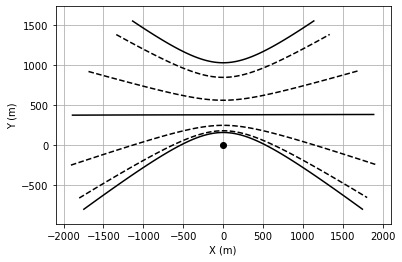

In [4]:
fig, ax = plt.subplots()
ax.plot(0, 0, 'ok')
for date in ('2023-06-21', '2023-9-23', '2023-12-21'):  # approximate equinoxes / solstices
    xx, yy = calculate_shadow(date)
    ax.plot(xx, yy, '-k')
for date in ('2023-07-21', '2023-08-21', '2023-10-21', '2023-11-21'):  # intermediate dates
    xx, yy = calculate_shadow(date)
    ax.plot(xx, yy, '--k')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.axis('equal')
ax.grid()